In [1]:
import sys
# Add the path to your Kalpana installation
sys.path.append('../../Kalpana/kalpana')
sys.path.append("/home/aesgeorges/Kalpana/kalpana")
sys.path.append("/home/alexandre-georges/Kalpana/kalpana")

In [2]:
import cmocean
import numpy as np
import netCDF4 as netcdf
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import matplotlib.ticker as ticker
from plotting import plot_nc

In [3]:
# Storm to be visualized
stage = "staging"
HURRICANE = "Matthew2016"
path = "../"+stage+"/runs/"+HURRICANE
path_base = "../basemodel/runs/"+HURRICANE

In [4]:
ele = netcdf.Dataset(path+'/fort.63.nc')
ele_base = netcdf.Dataset(path_base+'/fort.63.nc')
vel = netcdf.Dataset(path+'/fort.64.nc')
max = netcdf.Dataset(path+'/maxele.63.nc')

In [5]:
timesteps = vel.variables['time'].shape[0]
timesteps

592

<GeoAxesSubplot: xlabel='Longitude [deg]', ylabel='Latitude [deg]'>

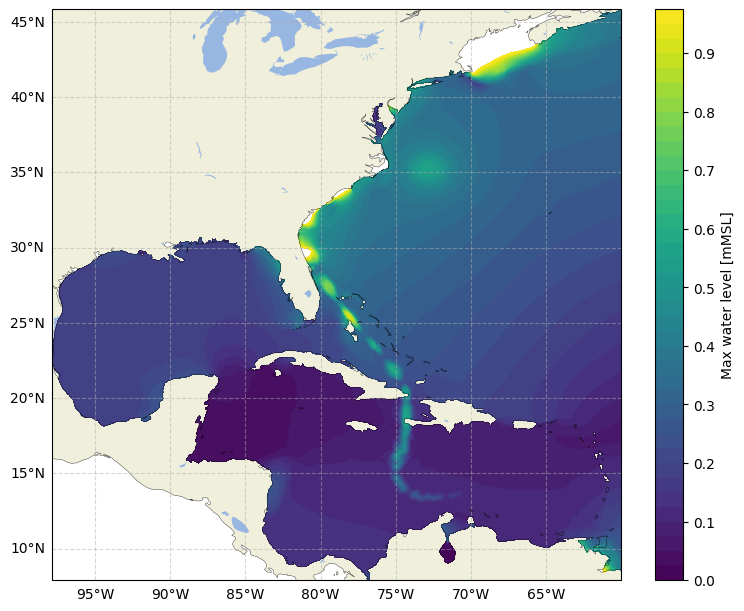

In [6]:
# Max Elevation
plot_nc(max, 'zeta_max', levels=np.arange(0, 1, 0.025), background_map=True, cbar=True, cb_label='Max water level [mMSL]')

In [7]:
dt = 80.142686 
NSPOOL = 20
time = (np.arange(timesteps) * (dt*20))
time_in_days = time / (24 * 60 * 60)

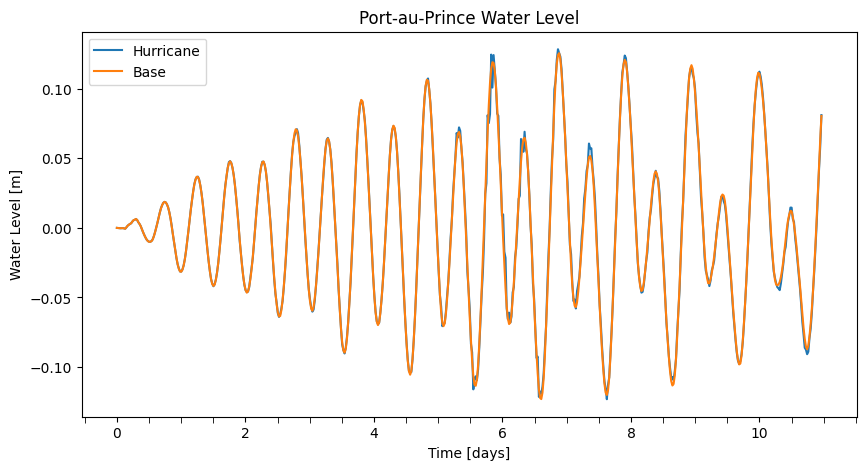

In [8]:
zeta = ele.variables['zeta']
zeta_base = ele_base.variables['zeta']

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time_in_days, zeta[:, 17523])
ax.plot(time_in_days, zeta_base[:, 17523])
ax.set_xlabel('Time [days]')
ax.set_ylabel('Water Level [m]')
ax.set_title('Port-au-Prince Water Level')
ax.legend(['Hurricane', 'Base'])

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.tick_params(axis='x', which='minor', length=4, color='black')

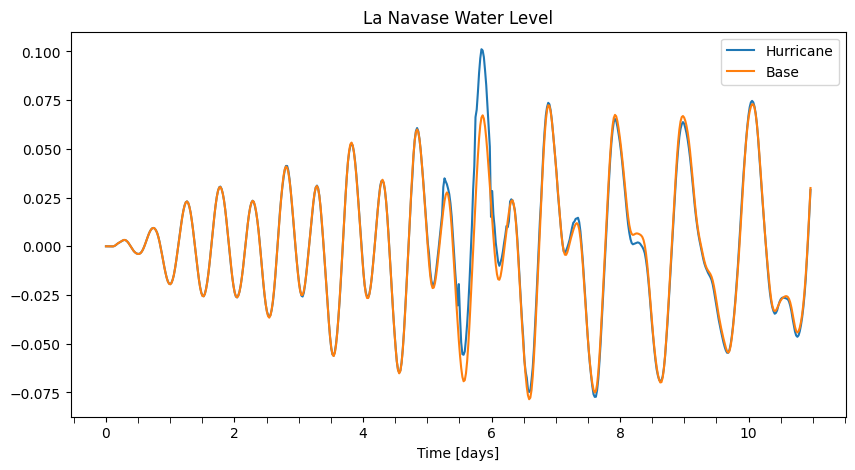

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time_in_days, zeta[:, 12006])
ax.plot(time_in_days, zeta_base[:, 12006])
ax.set_xlabel('Time [days]')
ax.set_title('La Navase Water Level')
ax.legend(['Hurricane', 'Base'])

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.tick_params(axis='x', which='minor', length=4, color='black')

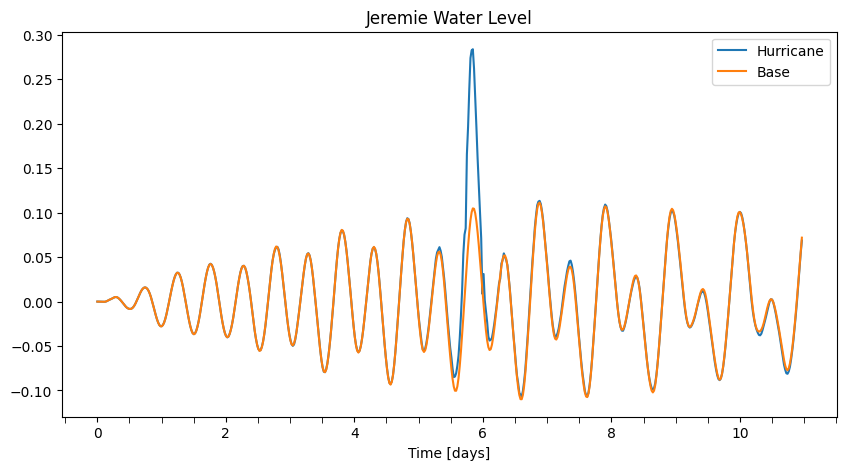

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time_in_days, zeta[:, 13120])
ax.plot(time_in_days, zeta_base[:, 13120])
ax.set_xlabel('Time [days]')
ax.set_title('Jeremie Water Level')
ax.legend(['Hurricane', 'Base'])

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.tick_params(axis='x', which='minor', length=4, color='black')

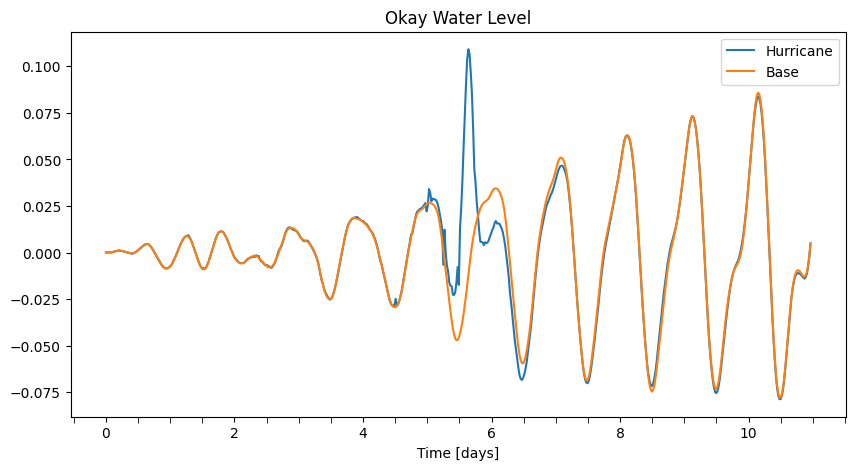

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time_in_days, zeta[:, 13665])
ax.plot(time_in_days, zeta_base[:, 13665])
ax.set_xlabel('Time [days]')
ax.set_title('Okay Water Level')
ax.legend(['Hurricane', 'Base'])

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.tick_params(axis='x', which='minor', length=4, color='black')

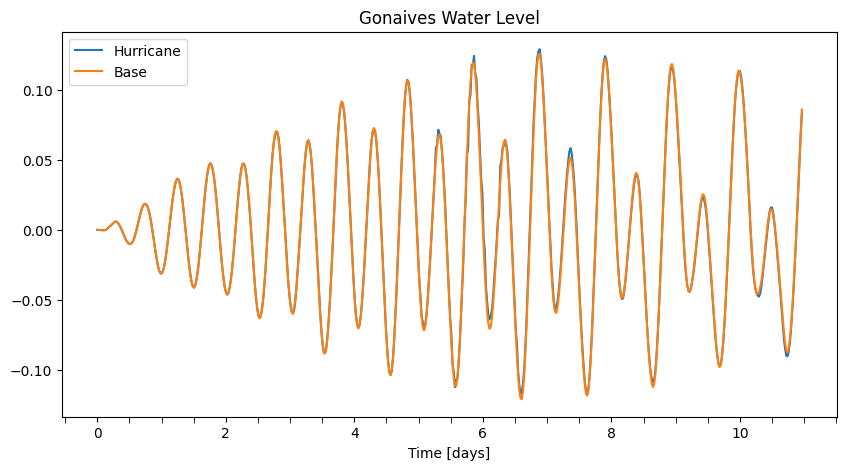

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time_in_days, zeta[:, 15933])
ax.plot(time_in_days, zeta_base[:, 15933])
ax.set_xlabel('Time [days]')
ax.set_title('Gonaives Water Level')
ax.legend(['Hurricane', 'Base'])

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.tick_params(axis='x', which='minor', length=4, color='black')

<GeoAxesSubplot: xlabel='Longitude [deg]', ylabel='Latitude [deg]'>

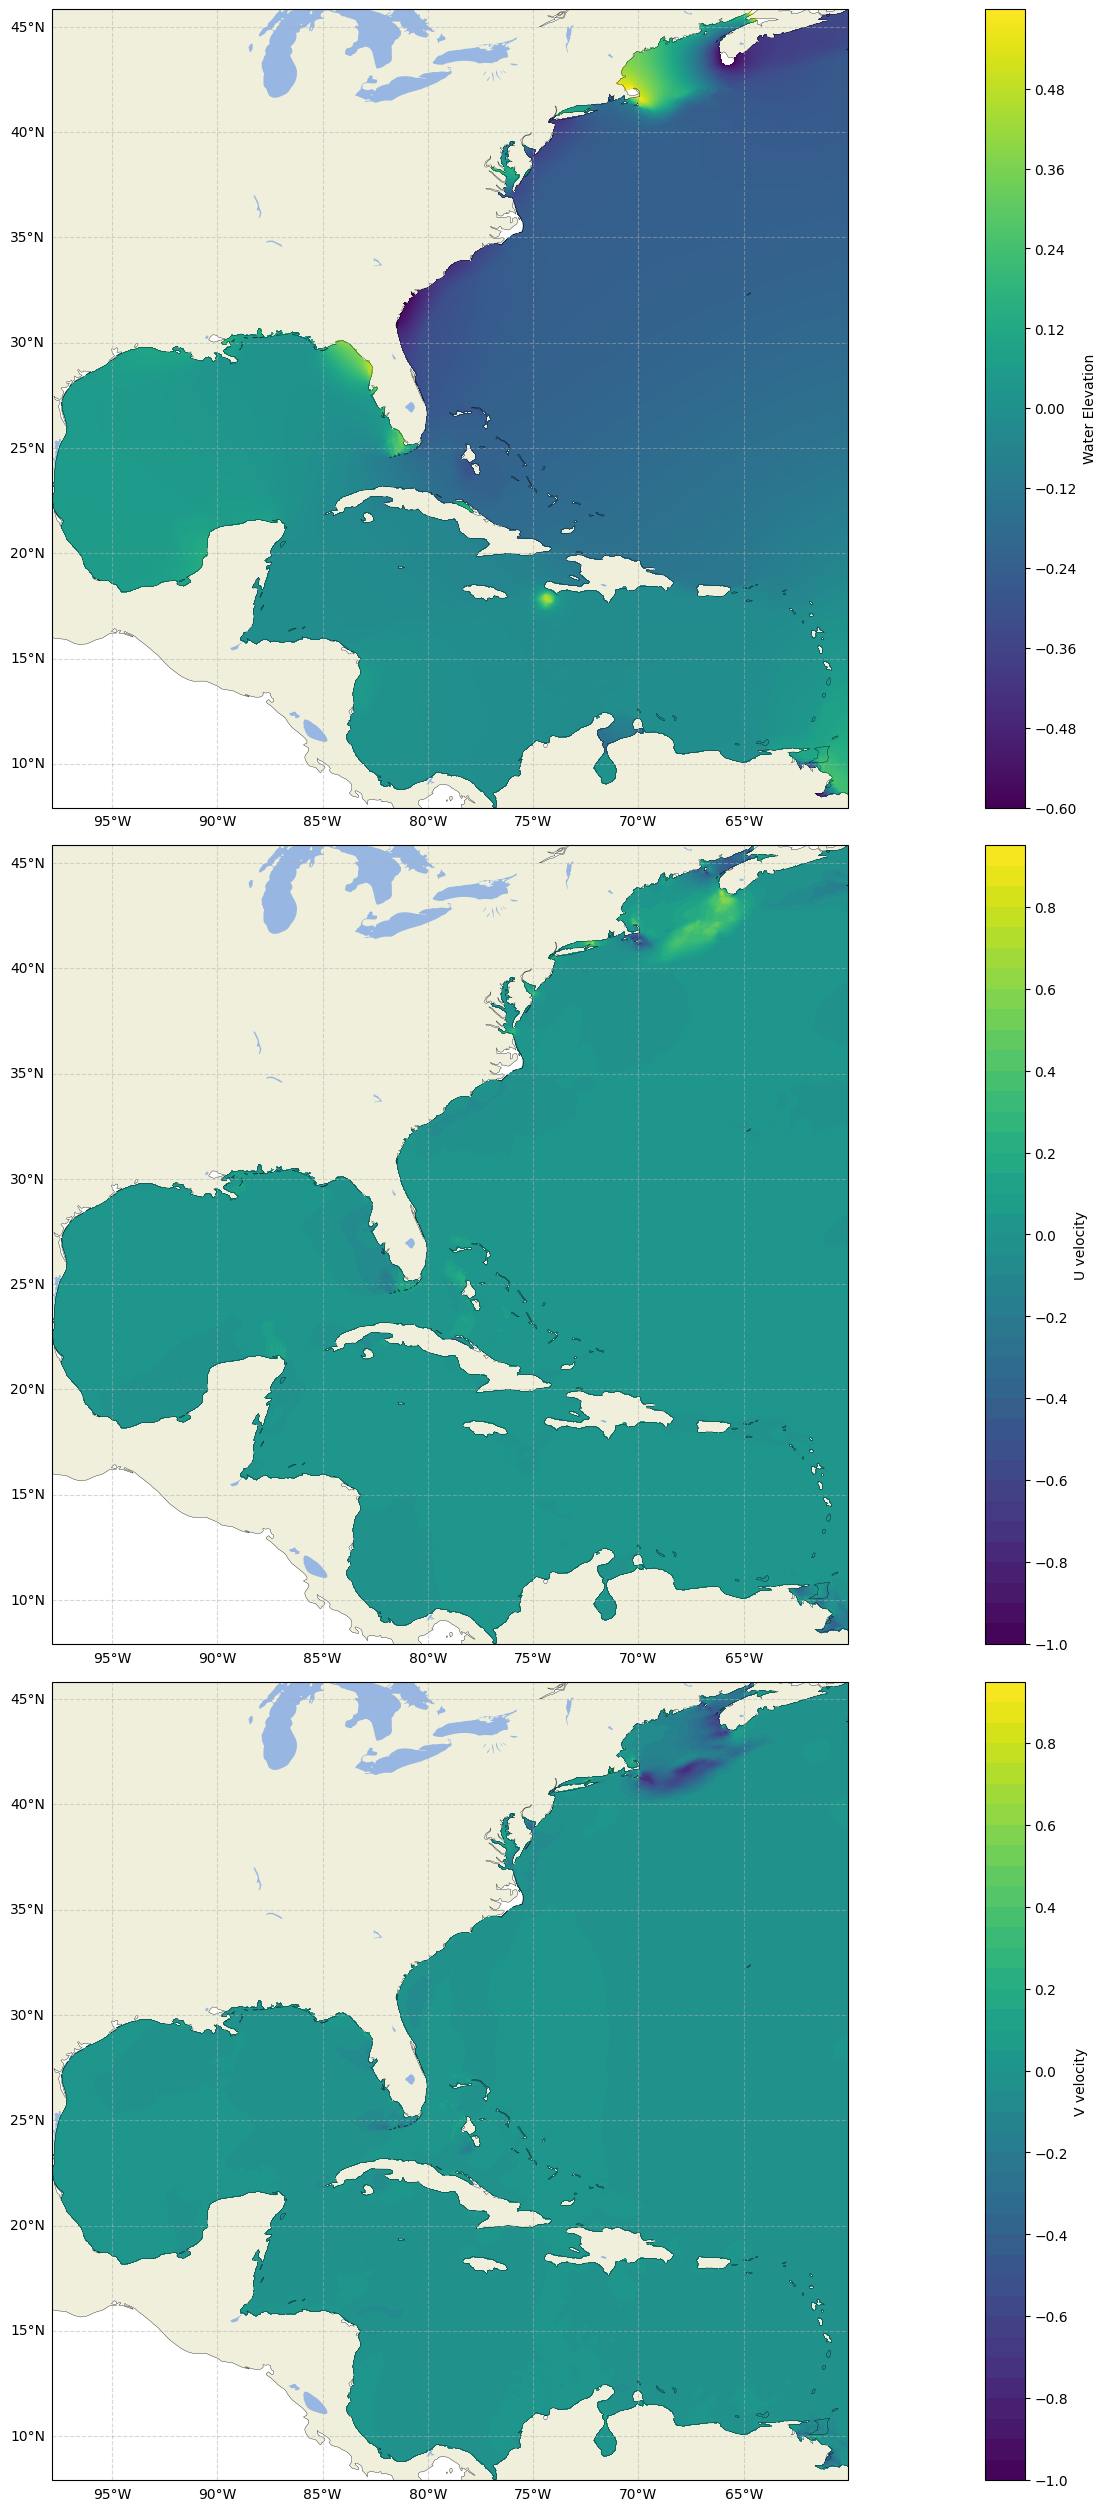

In [17]:
fig, axs = plt.subplots(3,1, subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True, figsize=(30,25))
axs = axs.flatten()
ts = 300
plot_nc(ele, 'zeta', ts=ts, ax=axs[0], levels=np.arange(-.6, .6, 0.001), background_map=True, cbar=True, cb_label='Water Elevation', fig=fig)
plot_nc(vel, 'u-vel', ts=ts, ax=axs[1], levels=np.arange(-1., 1., 0.05), background_map=True, cbar=True, cb_label='U velocity', fig=fig)
plot_nc(vel, 'v-vel', ts=ts, ax=axs[2], levels=np.arange(-1., 1., 0.05), background_map=True, cbar=True, cb_label='V velocity', fig=fig)